# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Необходимо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Откроем и сохраним файлы данных

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

Рассмотрим полученные данные

In [3]:
geo_data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
geo_data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
geo_data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков в данных нет, типы данных указаны верно, названия столбцов корректны

Проверим статистики данных

In [9]:
geo_data_0.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


In [10]:
geo_data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


In [11]:
geo_data_2.describe().T

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


Проверим наличие дубликатов в данных

In [12]:
geo_data_0.duplicated().sum()

0

In [13]:
geo_data_1.duplicated().sum()

0

In [14]:
geo_data_2.duplicated().sum()

0

Дубликатов в данных не обнаружено

### Вывод 
Имеются данные геологоразведки трёх регионов, содержащие следующую информацию:\
**Признаки**\
`id` — уникальный идентификатор скважины;\
`f0`, `f1`, `f2` — три признака точек (неважно, что они означают, но сами признаки значимы);\
**Целевой признак**\
`product` — объём запасов в скважине (тыс. баррелей)

1) Дубликатов в данных не обнаружено\
2) Категориальных признаков нет\
3) Пропусков в данных нет

## Обучение и проверка модели

Разобьем данные на обучающую и валидационную выборки в соотношении 75/25

In [15]:
#создадим функцию, на входе целый датасет на выходе разделенный на выборки (train и valid) в соотношении 75/25
def separ(df):
    target = df['product']
    features = df.drop(['product', 'id'], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target,test_size=0.25, train_size=0.75, random_state=42)
    return features_train, features_valid, target_train, target_valid

In [16]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = separ(geo_data_0)

In [17]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = separ(geo_data_1)

In [18]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = separ(geo_data_2)

Обучим модель Линейной регрессии 

In [19]:
def linear_valid(features_train, features_valid, target_train, target_valid):
    best = 100
    best_iter = 0
    for i in range(100, 1000, 50):
        model = LinearRegression()
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        rmse = mean_squared_error(target_valid, predictions) ** .5
        if best > rmse:
            best = rmse
            best_iter = i       
    print('\n','RMSE наилучшей модели на валидационной выборке:', round(best,2),'\n')
    return predictions, best

Посчитаем RMSE Линейной регрессии для первого региона

In [20]:
predict_0, rmse_0 = linear_valid(features_train_0, features_valid_0, target_train_0, target_valid_0)


 RMSE наилучшей модели на валидационной выборке: 37.76 



Посчитаем RMSE Линейной регрессии для второго региона

In [21]:
predict_1, rmse_1 = linear_valid(features_train_1, features_valid_1, target_train_1, target_valid_1)


 RMSE наилучшей модели на валидационной выборке: 0.89 



Посчитаем RMSE Линейной регрессии для третьего региона

In [22]:
predict_2, rmse_2 = linear_valid(features_train_2, features_valid_2, target_train_2, target_valid_2)


 RMSE наилучшей модели на валидационной выборке: 40.15 



Создадим функцию для сохранения предсказаний `predict` и правильные ответы `target` на валидационной выборке 

и посчитаем разницу средних значений правильных и предсказанных ответов для каждого региона

In [23]:
def save_predict(features_valid, target_valid, predict, rmse):
    region = features_valid.copy()
    region['target'] = target_valid.copy()
    region['predict'] = predict
    a = region['target'].mean()
    b = region['predict'].mean()
    print('Предсказанный средний запас сырья для региона', round(b,2))
    print('RSME модели для региона', round(rmse,2))
    print('Средний запас сырья для региона', round(a,2))
    print('Разница между средним запасом и предсказанным средним для региона', round(a-b,2))
    return region

Посчитаем разницу средних значений правильных и предсказанных ответов для первого региона

In [24]:
region_0 = save_predict(features_valid_0,target_valid_0, predict_0, rmse_0)

Предсказанный средний запас сырья для региона 92.4
RSME модели для региона 37.76
Средний запас сырья для региона 92.33
Разница между средним запасом и предсказанным средним для региона -0.07


Проверим сохранение предсказаний в `predict` и правильных ответов в `target`

In [25]:
region_0

,f0,f1,f2,target,predict
75721,0.599283,-0.557623,2.121187,122.073350,101.901017
80184,0.739017,-0.463156,-1.347584,48.738540,78.217774
19864,1.422743,-0.534917,3.718798,131.338088,115.266901
76699,1.580244,-0.238458,2.805149,88.327757,105.618618
92991,0.918974,0.023961,2.598575,36.959266,97.980185
...,...,...,...,...,...
21271,0.754647,-0.512213,2.610771,148.821520,105.076959
34014,-0.062056,0.516884,0.714446,123.454003,74.768176
81355,0.593769,-0.425260,-0.525017,91.945213,82.544397
65720,0.198209,0.453940,1.497557,149.295563,81.826689


Посчитаем разницу средних значений правильных и предсказанных ответов для второго региона

In [26]:
region_1 = save_predict(features_valid_1,target_valid_1, predict_1, rmse_1)

Предсказанный средний запас сырья для региона 68.71
RSME модели для региона 0.89
Средний запас сырья для региона 68.73
Разница между средним запасом и предсказанным средним для региона 0.01


Проверим сохранение предсказаний в `predict` и правильных ответов в `target`

In [27]:
region_1

,f0,f1,f2,target,predict
75721,6.078076,0.084568,0.002957,0.000000,0.844738
80184,16.462386,2.712946,1.993030,53.906522,52.921612
19864,7.051898,0.766983,4.990194,134.766305,135.110385
76699,-0.240045,-0.380804,3.999693,107.813044,109.494863
92991,13.350111,-8.558281,0.002010,0.000000,-0.047292
...,...,...,...,...,...
21271,8.141417,-0.832158,4.001976,107.813044,108.351600
34014,16.601751,-8.141232,2.010371,53.906522,53.604049
81355,14.674777,-5.633890,1.004171,26.953261,26.708734
65720,-1.381118,-5.464254,4.001648,110.992147,109.823087


Посчитаем разницу средних значений правильных и предсказанных ответов для третьего региона

In [28]:
region_2 = save_predict(features_valid_2,target_valid_2, predict_2, rmse_2)

Предсказанный средний запас сырья для региона 94.77
RSME модели для региона 40.15
Средний запас сырья для региона 95.15
Разница между средним запасом и предсказанным средним для региона 0.38


Проверим сохранение предсказаний в `predict` и правильных ответов в `target`

In [29]:
region_2

,f0,f1,f2,target,predict
75721,2.111118,-1.679773,3.112240,117.441301,98.301916
80184,0.734759,0.747788,3.670879,47.841249,101.592461
19864,-2.513109,0.844631,-4.922889,45.883483,52.449099
76699,-2.035301,-1.522988,5.072839,139.014608,109.922127
92991,2.744145,1.429952,-1.372661,84.004276,72.411847
...,...,...,...,...,...
21271,-1.532677,0.365315,3.840436,40.797226,102.764169
34014,1.381244,1.168552,2.262261,87.144239,93.431823
81355,2.902487,0.839203,-2.817721,52.039812,64.098390
65720,0.942093,-1.424641,0.567559,136.961454,83.764135


Посмотрим на распределение данных в датасетах

In [30]:
def sub_plot(region):
    x = region['f0']
    y = region['f1']
    z = region['f2']
    s = region['target']
    fig = plt.figure(figsize=(16,9))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, s=s, alpha=0.01);

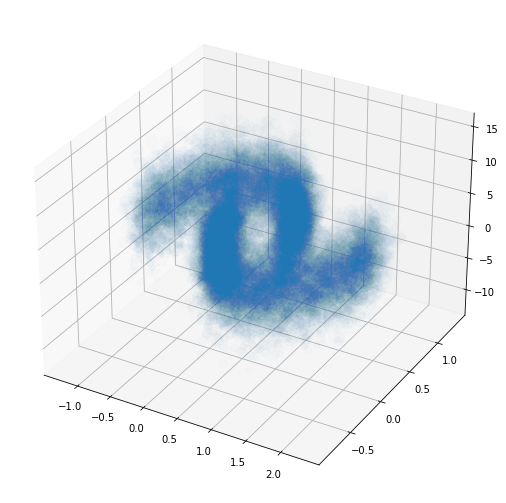

In [31]:
sub_plot(region_0)

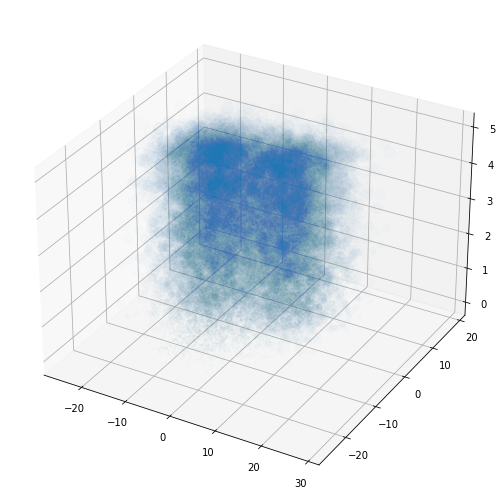

In [32]:
sub_plot(region_1)

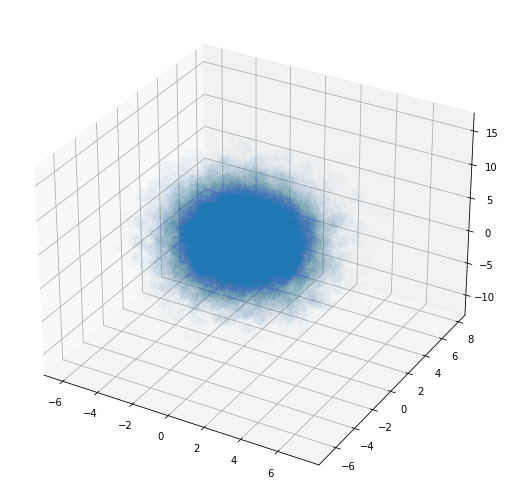

In [33]:
sub_plot(region_2)

### Вывод


1) Написали функцию и разделили датасеты на обучающие и валидационные выборки в соотношении 75/25;

2) Обучили модель линейной регрессии;

3) Предсказали средний запас сырья для каждой скважины в регионе;

4) RMSE для каждого региона сильно различается от 0,89 до 40,15, что может быть вызвано распределением данных;

5) Средний запас сырья в регионах от 68,73 до 95,15 т.тонн;

6) В валидационных выборках регионов сохранили предсказанные и правильные истинные значения;

7) Разница среднего предсказанного значения и среднего значения не превышает 0,38 т.тонн, но не отображает реального расхождения в предсказанных результатах, в отличие от метрики RMSE; 

8) Построили графики распределений данных, показывающие как форма распределения влияет на RMSE и практически не влияет на разницу средних.

## Подготовка к расчёту прибыли

Объявим необходимые переменные

Бюджет `BUDGET ` равный 10 млрд. рублей

In [34]:
BUDGET = 10_000_000_000

Количество исследуемых точек `STUDY_POINTS`

In [35]:
STUDY_POINTS = 500

Количество точет для разработки `DEV_POINTS`

In [36]:
DEV_POINTS = 200

так как в каждом регионе рассматривается до 200 лучших скважин, то средний бюджет на скважину `WELL_BUDGET`
равен 1/200 от общего бюджета региона

In [49]:
WELL_BUDGET = BUDGET  / DEV_POINTS

Доход `BARREL_PROFIT` с тысячи баррелей руб.

In [47]:
BARREL_PROFIT = 450_000

Безубыточный объем `BREAK_VOLUME` равен бюджету на скважину деленному на прибыль с барреля

In [50]:
BREAK_VOLUME = WELL_BUDGET / BARREL_PROFIT
print(f'Безубыточный объем добычи: {BREAK_VOLUME:.2f} тыс. баррелей')

Безубыточный объем добычи: 111.11 тыс. баррелей


Сравним среднее значение запаса нефти в каждом регионе с безубыточным минимумом

In [40]:
print('Средний запас в первом регионе:', region_0['target'].mean())
print('Средний запас во втором регионе:', region_1['target'].mean())
print('Средний запас в третьем регионе:', region_2['target'].mean())

Средний запас в первом регионе: 92.32595637084387
Средний запас во втором регионе: 68.72538074722745
Средний запас в третьем регионе: 95.15099907171961


### Вывод

1) Подготовили ряд переменных для прибыли;

2) Безубыточный объем скважины 111,11 тыс. тонн;

3) Средний объем скважин в регионах от 68,72 до 95,15 тыс. тонн, что меньше безубыточного.

## Расчёт прибыли и рисков 

Напишим функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [41]:
def profits(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return BARREL_PROFIT * selected.sum()

Посчитаем риски и прибыль для каждого региона с помощью Bootstrap

In [42]:
def risks_profits(target, prediction):
    state = RandomState(42)
    values = []
    prediction = pd.Series(prediction).reset_index(drop=True)
    target = pd.Series(target).reset_index(drop=True)
    for i in range(1000):
        target_subsample = target.sample(n=STUDY_POINTS, replace=True, random_state=state)
        probs_subsample = prediction[target_subsample.index]
        values.append(profits(target_subsample, probs_subsample, DEV_POINTS))
    values = pd.Series(values)
    mean = values.mean() 
    lower = values.quantile(0.025) 
    upper = values.quantile(0.975) 
    risk = values[values < BUDGET].count() / values.count() * 100
    print(f'Средняя прибыль: {mean:.2f} руб.')
    print(f'95%-й доверительный интервал от {lower:.2f} до {upper:.2f} руб.')
    print(f'Риск получения отрицательной прибыли: {risk:.2f}%')

In [43]:
risks_profits(region_0['target'], region_0['predict'])

Средняя прибыль: 10427847560.46 руб.
95%-й доверительный интервал от 9902750170.43 до 10954215192.71 руб.
Риск получения отрицательной прибыли: 5.50%


In [44]:
risks_profits(region_1['target'], region_1['predict'])

Средняя прибыль: 10511362776.20 руб.
95%-й доверительный интервал от 10098870649.90 до 10940720511.65 руб.
Риск получения отрицательной прибыли: 0.90%


In [45]:
risks_profits(region_2['target'], region_2['predict'])

Средняя прибыль: 10402575607.51 руб.
95%-й доверительный интервал от 9862837774.93 до 10929887528.03 руб.
Риск получения отрицательной прибыли: 7.40%


### Вывод 

1) Написали функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели;

2) Посчитали риски и прибыль для каждого региона;

3) Наибольшая средняя прибыль во втором регионе - 10511362776.20 руб;

4) Наменьшая средняя прибыть в третьем регионе - 10402575607.51 руб;

5) Наибольшый риск получения отрицательной прибыли в третьем регионе - 7.40%;

6) Наименьший риск получения отрицательной прибыли во втором регионе - 0.9%;

7) Для разработки предлагается 2ой регион т.к. у него наибольшая средняя прибыль и наименьший риск получения отрицательной прибыли.